<a href="https://colab.research.google.com/github/Madina069/Project_No.2_ML/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Загружаем готовый корпус с сайта kaggle.com
data_hate = pd.read_csv('/content/Copy of HateSpeechDataset.csv')
data_hate.head()

,Content,Label,Content_int
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,..."
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22..."
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,..."
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,..."
4,afro american basho,1,"[146715, 46, 47, 48, 146714]"


In [ ]:
#Перемешиваем данные

data_hate = data_hate.sample(frac=1).reset_index(drop=True)

In [ ]:
data_hate['Label'].value_counts()

Label
0        361594
1         79305
Label         7
Name: count, dtype: int64

In [ ]:
data_hate[data_hate['Label'] == 'Label']

,Content,Label,Content_int
28317,content,Label,"[146715, 7139, 146714]"
211811,content,Label,"[146715, 7139, 146714]"
240361,content,Label,"[146715, 7139, 146714]"
240724,content,Label,"[146715, 7139, 146714]"
277240,content,Label,"[146715, 7139, 146714]"
283976,content,Label,"[146715, 7139, 146714]"
381060,content,Label,"[146715, 7139, 146714]"


In [ ]:
# Избавляемся от ячеек, не содержащих комментарии

cells_to_drop = data_hate[data_hate['Label'] == 'Label'].index.values
data_hate.drop(cells_to_drop, axis = 0, inplace = True)

In [ ]:
#Балансировка данных для лучшего обучения модели

balance = True

balanced_df = 0

if balance == True:
    top_n = 75000

    hate_speech = data_hate[data_hate['Label'] == '1'].head(top_n)
    neutral = data_hate[data_hate['Label'] == '0'].head(top_n)
    balanced_df = pd.concat([hate_speech, neutral])

    print(balanced_df['Label'].value_counts())
else:
    balanced_df = data_hate

Label
1    75000
0    75000
Name: count, dtype: int64


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from gensim.parsing.porter import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
#Токенизация и стемминг твитов

def preprocess_tweet(tweet):
    tweet = word_tokenize(tweet)
    tweet_stemmed = [stemmer.stem(word) for word in tweet]

    tweet_stemmed = ' '.join(tweet_stemmed)
    return tweet_stemmed

balanced_df['Stemmed_tweets'] = balanced_df['Content'].apply(preprocess_tweet)

In [ ]:
balanced_df.head()

,Content,Label,Content_int,Stemmed_tweets
4,hey dude you sucked your dog s cock or your do...,1,"[146715, 563, 853, 26, 10016, 72, 487, 140, 98...",hei dude you suck your dog s cock or your dog ...
5,utc stop trying to twist everything i say into...,1,"[146715, 49317, 308, 691, 7, 12874, 329, 80, 1...",utc stop try to twist everyth i sai into a per...
6,newsier new prey new destruction new commercia...,1,"[146715, 48880, 189, 11480, 189, 1155, 189, 60...",newsier new prei new destruct new commerci new...
7,i love how hateful slopeheads are,1,"[146715, 80, 517, 132, 748, 24944, 154, 146714]",i love how hate slopehead ar
13,but it s humane for illegal aliens to kill ame...,1,"[146715, 157, 63, 140, 15318, 255, 428, 429, 7...",but it s human for illeg alien to kill america...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#Разделение данных на подвыборки и векторизация твитов

X_train, X_test, y_train, y_test = train_test_split(balanced_df['Stemmed_tweets'],
                                                    balanced_df['Label'],
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [ ]:
X_train_cv = vectorizer.fit(X_train)

In [ ]:
X_train_cv =  vectorizer.transform(X_train)
X_test_cv =  vectorizer.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
#Бинарная классификация данных с помощью логистической регрессии

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_clf = LogisticRegression(random_state=42, class_weight='balanced', max_iter = 2000)

In [ ]:
lr_clf.fit(X_train_cv, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [ ]:
y_test_pred_lr = lr_clf.predict(X_test_cv)

In [ ]:
print(classification_report(y_test, y_test_pred_lr, target_names = ['Neutral', 'Negative']))

              precision    recall  f1-score   support

     Neutral       0.82      0.82      0.82     15039
    Negative       0.82      0.82      0.82     14961

    accuracy                           0.82     30000
   macro avg       0.82      0.82      0.82     30000
weighted avg       0.82      0.82      0.82     30000



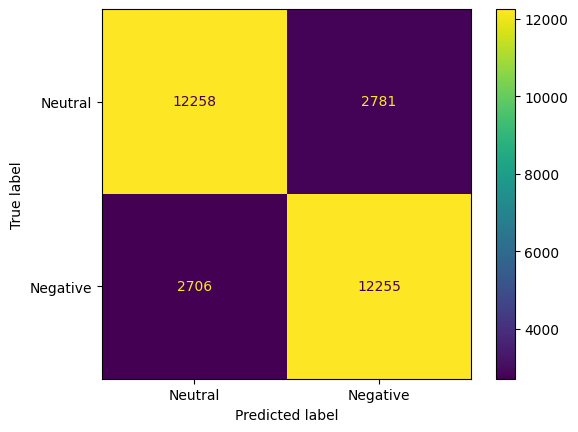

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_lr)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Neutral', 'Negative']).plot()

In [ ]:
#Бинарная классификация данных с помощью градиентного бустинга

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf_gb = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,
    max_depth=1, random_state=42).fit(X_train_cv, y_train)

In [ ]:
y_test_pred_gb = clf_gb.predict(X_test_cv)

In [ ]:
print(classification_report(y_test, y_test_pred_gb, target_names = ['Neutral', 'Negative']))

              precision    recall  f1-score   support

     Neutral       0.77      0.81      0.79     15039
    Negative       0.80      0.76      0.78     14961

    accuracy                           0.79     30000
   macro avg       0.79      0.79      0.78     30000
weighted avg       0.79      0.79      0.78     30000



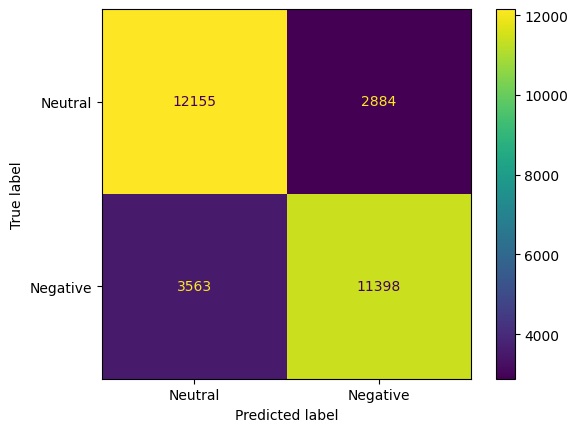

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_gb)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Neutral', 'Negative']).plot()

In [ ]:
#Балансировка данных для ансамблевой модели

balance = True

balanced_df_new = 0

if balance == True:
    top_n = 5000

    hate_speech = data_hate[data_hate['Label'] == '1'].head(top_n)
    neutral = data_hate[data_hate['Label'] == '0'].head(top_n)
    balanced_df_new = pd.concat([hate_speech, neutral])

    print(balanced_df_new['Label'].value_counts())
else:
    balanced_df_new = data_hate

Label
1    5000
0    5000
Name: count, dtype: int64


In [ ]:
balanced_df_new.head()

,Content,Label,Content_int
4,hey dude you sucked your dog s cock or your do...,1,"[146715, 563, 853, 26, 10016, 72, 487, 140, 98..."
5,utc stop trying to twist everything i say into...,1,"[146715, 49317, 308, 691, 7, 12874, 329, 80, 1..."
6,newsier new prey new destruction new commercia...,1,"[146715, 48880, 189, 11480, 189, 1155, 189, 60..."
7,i love how hateful slopeheads are,1,"[146715, 80, 517, 132, 748, 24944, 154, 146714]"
13,but it s humane for illegal aliens to kill ame...,1,"[146715, 157, 63, 140, 15318, 255, 428, 429, 7..."


In [ ]:
#Токенизация и стемминг твитов

def preprocess_tweet(tweet):
    tweet = word_tokenize(tweet)
    tweet_stemmed = [stemmer.stem(word) for word in tweet]

    tweet_stemmed = ' '.join(tweet_stemmed)
    return tweet_stemmed

balanced_df_new['Stemmed_tweets'] = balanced_df_new['Content'].apply(preprocess_tweet)

In [ ]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(balanced_df_new['Stemmed_tweets'],
                                                    balanced_df_new['Label'],
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [ ]:
X_train_sc_cv = vectorizer.fit(X_train_sc)

In [ ]:
X_train_sc_cv =  vectorizer.transform(X_train_sc)
X_test_sc_cv =  vectorizer.transform(X_test_sc)

In [ ]:
from sklearn.ensemble import StackingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
estimators = [('neigh',KNeighborsClassifier(n_neighbors=3)),
              ('nb', MultinomialNB()),
              ('bag', BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42))]

In [ ]:
clf_stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs = -1)

In [ ]:
clf_stacking.fit(X_train_sc_cv, y_train_sc)

StackingClassifier(estimators=[('neigh', KNeighborsClassifier(n_neighbors=3)),
                               ('nb', MultinomialNB()),
                               ('bag',
                                BaggingClassifier(estimator=SVC(),
                                                  random_state=42))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [ ]:
clf_stacking_preds = clf_stacking.predict(X_test_sc_cv)

In [ ]:
print(classification_report(y_test_sc, clf_stacking_preds, target_names=['Neutral', 'Negative']))

              precision    recall  f1-score   support

     Neutral       0.84      0.77      0.80       988
    Negative       0.79      0.85      0.82      1012

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# Структурирование нейросети: один полносвязный слой и два скрытых слоя. Функция активации последнего слоя - сигмоида.

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()

        # Linear function 1: vocab_size --> hidden_dim
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: hidden_dim --> hidden_dim
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3 (readout): hidden_dim --> output_dim
        self.fc3 = nn.Linear(hidden_dim, output_dim)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 3 (readout)
        out = self.fc3(out)

        return self.sigmoid(out)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cuda


In [ ]:
#Стемминг и кодирование твитов по новой, т.к. результатом предыдущего препроцессинга была строка

balanced_df['Tokens'] = balanced_df['Content'].apply(word_tokenize)
balanced_df['Tokens'] = [[stemmer.stem(word) for word in tokens] for tokens in balanced_df['Tokens']]

In [ ]:
#Создание словаря

from gensim import corpora
unique_words = corpora.Dictionary(balanced_df['Tokens'])
print(unique_words.token2id)

{'ani': 0, 'daj': 1, 'delta': 2, 'draft': 3, 'egomaniac': 4, 'i': 5, 'jake': 6, 'je': 7, 'melanot': 8, 'na': 9, 'nasa': 10, 'nervou': 11, 'pa': 12, 'pagan': 13, 'taj': 14, 'take': 15, 'the': 16, 'tribun': 17, 'za': 18, 'a': 19, 'and': 20, 'black': 21, 'differenti': 22, 'do': 23, 'not': 24, 'pant': 25, 'woman': 26, 'cotton': 27, 'peopl': 28, 'pick': 29, 'becaus': 30, 'countri': 31, 'flee': 32, 'from': 33, 'health': 34, 'hunger': 35, 'if': 36, 'poor': 37, 'poverti': 38, 'shithol': 39, 'suffer': 40, 'were': 41, 'why': 42, 'you': 43, 'your': 44, 'god': 45, 'is': 46, 'it': 47, 'my': 48, 'project': 49, 'retweet': 50, 'so': 51, 'truli': 52, 'act': 53, 'be': 54, 'could': 55, 'easier': 56, 'imposs': 57, 'of': 58, 'racism': 59, 'real': 60, 'stand': 61, 'system': 62, 'that': 63, 'to': 64, 'unfortun': 65, 'up': 66, 'midi': 67, 'ok': 68, 'rural': 69, 'see': 70, 'sole': 71, 'antifa': 72, 'ar': 73, 'gui': 74, 'know': 75, 'scare': 76, 'all': 77, 'almost': 78, 'an': 79, 'assad': 80, 'attack': 81, 'back

In [ ]:
n_words = len(unique_words)
n_words += 1
print(n_words)

60239


In [ ]:
#Функция для преобразования твитов в тензоры

def line_to_flat_tensor(sentence):
    tensor = torch.zeros(n_words, dtype=torch.float64, device=device)
    for word in sentence:
        try:
            tensor[unique_words.token2id[word]] += 1
        except KeyError:
            print("Word not found in dictionary: " + word)
            tensor[-1] += 1
    return tensor.view(1, -1).float()

In [ ]:
#Подбор параметров, функции потерь и метода оптимизации

input_dim = n_words
hidden_dim = 500
output_dim = 1
num_epochs = 500

ff_nn_bow_model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
ff_nn_bow_model.to(device)

loss_function = nn.BCELoss()
optimizer = optim.SGD(ff_nn_bow_model.parameters(), lr= 0.001)

In [ ]:
#Разделение данных на подвыборки, в этот раз для полносвязной нейросети

X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(balanced_df['Tokens'],
                                                    balanced_df['Label'],
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [ ]:
from tqdm import tqdm
import random

In [ ]:
losses = []

for epoch in tqdm(range(num_epochs)):
    train_loss = 0

    # Создаем тренировочный минибатч
    current_batch = random.sample(range(len(X_train_mlp)), 1000)
    current_X_train_mlp = [X_train_mlp.iloc[i] for i in current_batch]
    current_y_train_mlp = [y_train_mlp.iloc[i] for i in current_batch]

    for current_tweet, current_category in zip(current_X_train_mlp, current_y_train_mlp):
        # Очищаем накопленный градиент
        optimizer.zero_grad()

        # Создаем входные данные для модели
        line_tensor = line_to_flat_tensor(current_tweet)
        category_tensor = torch.tensor([int(current_category)], dtype=torch.float).view(-1, 1)

        # Forward pass: получаем предсказания модели
        probs = ff_nn_bow_model(line_tensor.to(device))

        # Вычисляем значение функции потерь
        loss = loss_function(probs, category_tensor.to(device))
        train_loss += loss.item()

        # Backward pass: обратное распространение ошибки
        loss.backward()

        # Апдейтим веса
        optimizer.step()

    losses.append(train_loss / len(current_X_train_mlp))
    # Зануляем лосс
    train_loss = 0


100%|██████████| 500/500 [30:52<00:00,  3.70s/it]


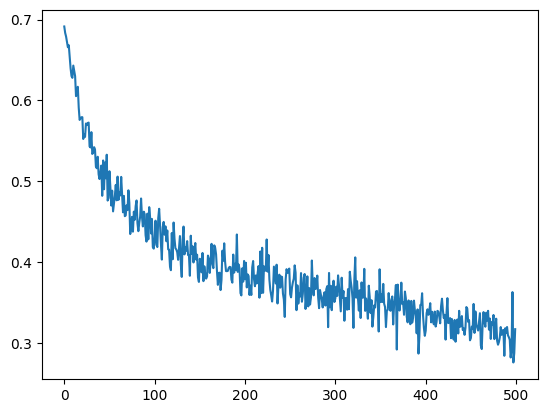

In [ ]:

plt.plot(losses)

In [ ]:
max(losses)

0.6914177511930466

In [ ]:
min(losses)

0.275808785231826

In [ ]:
#balanced_df['Tokens'] = balanced_df['Tokens'].to_frame()

In [ ]:
X_test_mlp = X_test_mlp.to_frame()
y_test = y_test.to_frame()

In [ ]:
predictions = []
original_labels = []

with torch.no_grad():
    for index, row in X_test_mlp.iterrows():
        line_tensor = line_to_flat_tensor(row['Tokens'])
        probs = ff_nn_bow_model(line_tensor)

        predictions.append(int(torch.round(probs).cpu().numpy()[0][0]))
        original_labels.append(int(y_test['Label'][index]))

print(classification_report(original_labels, predictions, target_names=['Neutral', 'Negative']))

              precision    recall  f1-score   support

     Neutral       0.87      0.76      0.81     15039
    Negative       0.79      0.89      0.83     14961

    accuracy                           0.82     30000
   macro avg       0.83      0.82      0.82     30000
weighted avg       0.83      0.82      0.82     30000



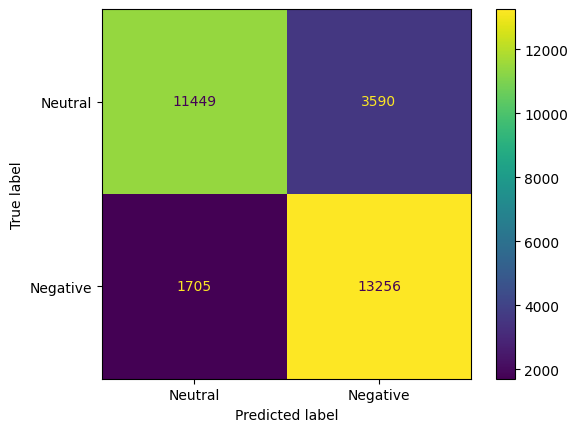

In [ ]:
cm = confusion_matrix(original_labels, predictions)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Neutral', 'Negative']).plot()

In [ ]:
test_df = pd.read_csv('/content/test_data_annot.csv', delimiter= ';')
test_df.head()

,Comment,Madi,Remi,Alain,Count
0,I guess im moving to africa,0,0,0,0
1,I had this country,0,0,0,0
2,The horrendously ignorant and homophobic comme...,0,0,0,0
3,God bless Zambia,0,0,0,0
4,It must be common to their cities since they h...,0,0,0,0


In [ ]:
%%capture
!pip install pymorphy2
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [ ]:
import re

In [ ]:
def preprocess_comment(comment):
    comment= comment.lower()
    comment = re.sub(r"[^a-zA-Z_]", ' ', comment)
    comment = word_tokenize(comment)
    comment_lemm = [morph.parse(word)[0].normal_form for word in comment]
    comment_stemmed = [stemmer.stem(word) for word in comment_lemm]
    return comment_stemmed
test_df['Comment_clean'] = test_df['Comment'].apply(preprocess_comment)

In [ ]:
X_test_new = test_df['Comment_clean']
y_test_new = test_df['Count']

In [ ]:
X_test_new = X_test_new.to_frame()
y_test_new = y_test_new.to_frame()

In [ ]:
predictions = []
original_labels = []

with torch.no_grad():
    for index, row in X_test_new.iterrows():
        line_tensor = line_to_flat_tensor(row['Comment_clean'])
        probs = ff_nn_bow_model(line_tensor)

        predictions.append(int(torch.round(probs).cpu().numpy()[0][0]))
        original_labels.append(int(y_test_new['Count'][index]))

print(classification_report(original_labels, predictions, target_names=['Neutral', 'Negative']))

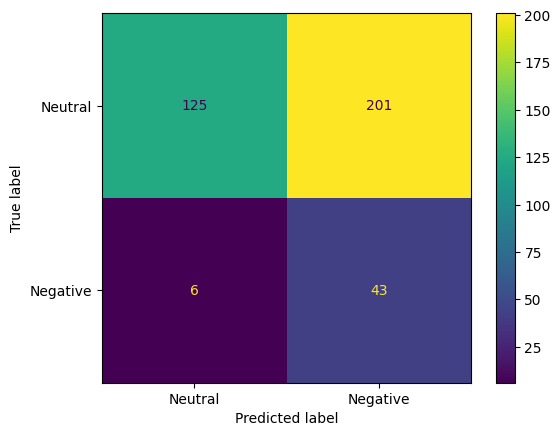

In [ ]:
cm = confusion_matrix(original_labels, predictions)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Neutral', 'Negative']).plot()